In [46]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)

State_Chem_filepath = "../DataFrames/Chem_mean_by_State.csv"
Chem_filepath = "../DataFrames/Chem_mean_by_Year.csv"
Mort_filepath = "../DataFrames/US_PM25_Mort_data.csv"
State_Pop_filepath = "../DataFrames/State_Population.csv"
Group_ST_YR_filepath = "../DataFrames/Group_State_then_Year.csv"
World_Pollution_filepath = "../DataFrames/World_Pollution_df.csv"
US_AQI_data = "../DataFrames/AQI_data.csv"

AQI_data = pd.read_csv(US_AQI_data)
Group_State_then_Year = pd.read_csv(Group_ST_YR_filepath)
Chem_by_Year = pd.read_csv(Chem_filepath)
US_PM25_Mort_data = pd.read_csv(Mort_filepath)
State_Population_df = pd.read_csv(State_Pop_filepath)
Chem_by_ST_Year = pd.read_csv(State_Chem_filepath)
World_Pollution_df = pd.read_csv(World_Pollution_filepath)

In [47]:
#regroup by year
Chem_by_Year.head(5)

,Year,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,SO2 AQI,CO AQI,O3 AQI,NO2 AQI,Year Average
0,2000,0.017433,0.024376,0.003649,0.557789,14.260908,9.540096,36.022688,30.969852,0.150812
1,2001,0.017600,0.025388,0.003133,0.509119,12.836909,8.792393,37.641191,31.310673,0.138810
2,2002,0.016387,0.026818,0.002744,0.500990,11.030905,8.486407,39.559160,29.363726,0.136735
3,2003,0.015865,0.025521,0.002865,0.492720,11.328351,8.246634,36.631114,28.334598,0.134243
4,2004,0.014968,0.024914,0.002855,0.448132,11.249550,7.411070,34.741209,26.940324,0.122717


In [48]:
US_PM25_Mort_data.head()

,Country,Variable,Year,Unit,Value
0,United States,Mortality from exposure to outdoor PM2.5,1990,Per 1 000 000 inhabitants,372.6680
1,United States,Mortality from exposure to outdoor PM2.5,1991,Per 1 000 000 inhabitants,371.3994
2,United States,Mortality from exposure to outdoor PM2.5,1992,Per 1 000 000 inhabitants,367.1144
3,United States,Mortality from exposure to outdoor PM2.5,1993,Per 1 000 000 inhabitants,375.3801
4,United States,Mortality from exposure to outdoor PM2.5,1994,Per 1 000 000 inhabitants,373.4384


In [49]:
merge_table = pd.merge(Chem_by_Year, US_PM25_Mort_data, on="Year")

In [50]:
merge_table.head()

,Year,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,SO2 AQI,CO AQI,O3 AQI,NO2 AQI,Year Average,Country,Variable,Unit,Value
0,2000,0.017433,0.024376,0.003649,0.557789,14.260908,9.540096,36.022688,30.969852,0.150812,United States,Mortality from exposure to outdoor PM2.5,Per 1 000 000 inhabitants,362.2790
1,2001,0.017600,0.025388,0.003133,0.509119,12.836909,8.792393,37.641191,31.310673,0.138810,United States,Mortality from exposure to outdoor PM2.5,Per 1 000 000 inhabitants,361.3241
2,2002,0.016387,0.026818,0.002744,0.500990,11.030905,8.486407,39.559160,29.363726,0.136735,United States,Mortality from exposure to outdoor PM2.5,Per 1 000 000 inhabitants,359.6222
3,2003,0.015865,0.025521,0.002865,0.492720,11.328351,8.246634,36.631114,28.334598,0.134243,United States,Mortality from exposure to outdoor PM2.5,Per 1 000 000 inhabitants,355.1779
4,2004,0.014968,0.024914,0.002855,0.448132,11.249550,7.411070,34.741209,26.940324,0.122717,United States,Mortality from exposure to outdoor PM2.5,Per 1 000 000 inhabitants,342.3452


In [51]:
merge_table.to_csv("../DataFrames/merged_set_data.csv", header=True)

In [52]:
nAQI_data = AQI_data.drop(columns='Unnamed: 0')
nAQI_data.head()

,State Code,County Code,State,County,City,Year,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,4,13,Arizona,Maricopa,Phoenix,2000,46,34,13.0,25.0
1,4,13,Arizona,Maricopa,Phoenix,2000,34,27,4.0,26.0
2,4,13,Arizona,Maricopa,Phoenix,2000,48,14,16.0,28.0
3,4,13,Arizona,Maricopa,Phoenix,2000,72,28,23.0,34.0
4,4,13,Arizona,Maricopa,Phoenix,2000,58,10,21.0,42.0


In [53]:
AQI_Mean_by_Year = nAQI_data.groupby(['Year']).mean()
AQI_Mean_by_Year.head()

,State Code,County Code,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
Year,,,,,,
2000,21.585471,80.813351,30.969852,36.022688,14.260908,9.540096
2001,20.090373,72.661035,31.310673,37.641191,12.836909,8.792393
2002,20.344319,67.397495,29.363726,39.559160,11.030905,8.486407
2003,20.592522,70.604553,28.334598,36.631114,11.328351,8.246634
2004,20.894412,73.489033,26.940324,34.741209,11.249550,7.411070


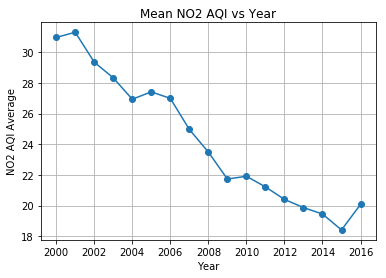

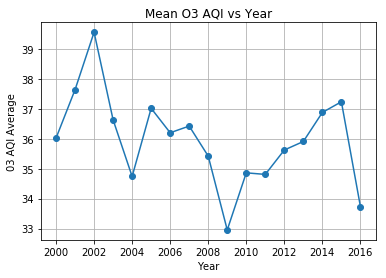

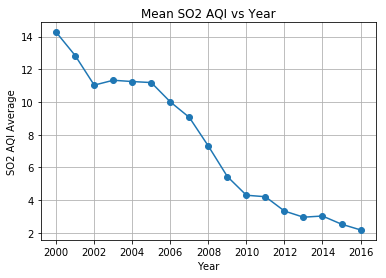

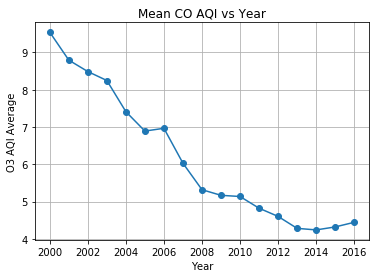

In [54]:
plt.subplot()
plt.plot(merge_table['Year'], AQI_Mean_by_Year['NO2 AQI'], marker='o')
plt.title("Mean NO2 AQI vs Year")
plt.xlabel("Year")
plt.ylabel("NO2 AQI Average")
plt.grid()
plt.show()

plt.subplot()
plt.plot(merge_table['Year'], AQI_Mean_by_Year['O3 AQI'], marker='o')
plt.title("Mean O3 AQI vs Year")
plt.xlabel("Year")
plt.ylabel("03 AQI Average")
plt.grid()
plt.show()

plt.subplot()
plt.plot(merge_table['Year'], AQI_Mean_by_Year['SO2 AQI'], marker='o')
plt.title("Mean SO2 AQI vs Year")
plt.xlabel("Year")
plt.ylabel("SO2 AQI Average")
plt.grid()
plt.show()

plt.subplot()
plt.plot(merge_table['Year'], AQI_Mean_by_Year['CO AQI'], marker='o')
plt.title("Mean CO AQI vs Year")
plt.xlabel("Year")
plt.ylabel("O3 AQI Average")
plt.grid()
plt.show()


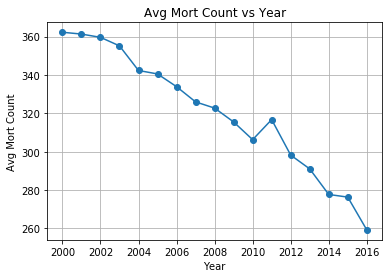

In [55]:
plt.plot(merge_table['Year'], merge_table['Value'], marker='o')
plt.title("Avg Mort Count vs Year")
plt.xlabel("Year")
plt.ylabel("Avg Mort Count")
plt.grid()

In [56]:
#Drop additional 'Unnamed' column
nState_Population_df = State_Population_df.drop(columns='Unnamed: 0')
nState_Population_df

,Year,Year Pullutant Average,Year Mort Count,Alabama Population,Alaska Population,Arizona Population,Arkansas Population,California Population,Colorado Population,Connecticut Population,...,Texas Population,Utah Population,Vermont Population,Virginia Population,Washington Population,"Washington, DC Population",West Virginia Population,Wisconsin Population,Wyoming Population,Total US Population Estimate
0,2010,0.091656,306.2926,4712651.0,691189.0,6246816.0,2872684.0,36637290.0,4887061.0,3545837.0,...,24311891.0,2657236.0,624258.0,7841754.0,6561297.0,584400.0,1840802.0,5637947.0,545579.0,307727594.0
1,2011,0.087565,316.7458,4747424.0,700703.0,6337373.0,2895928.0,36969200.0,4966061.0,3558172.0,...,24774187.0,2715379.0,624958.0,7926192.0,6652845.0,593955.0,1846372.0,5664893.0,554697.0,310346358.0
2,2012,0.084872,298.2415,4777326.0,711139.0,6410979.0,2916372.0,37325068.0,5042853.0,3572213.0,...,25208897.0,2766233.0,625498.0,8014955.0,6738714.0,605759.0,1850481.0,5687219.0,562803.0,312855438.0
3,2013,0.078813,291.0552,4799277.0,720316.0,6479703.0,2933369.0,37659181.0,5119329.0,3583561.0,...,25639373.0,2813673.0,625904.0,8100653.0,6819579.0,619371.0,1853619.0,5706871.0,570134.0,315219560.0
4,2014,0.078189,277.7249,4817678.0,728300.0,6561516.0,2947036.0,38066920.0,5197580.0,3592053.0,...,26092033.0,2858111.0,626358.0,8185131.0,6899123.0,633736.0,1853881.0,5724692.0,575251.0,317746049.0
5,2015,0.079513,276.3403,4830620.0,733375.0,6641928.0,2958208.0,38421464.0,5278906.0,3593222.0,...,26538614.0,2903379.0,626604.0,8256630.0,6985464.0,647484.0,1851420.0,5742117.0,579679.0,320098094.0
6,2016,0.081310,259.2433,4841164.0,736855.0,6728577.0,2968472.0,38654206.0,5359295.0,3588570.0,...,26956435.0,2948427.0,626249.0,8310301.0,7073146.0,659009.0,1846092.0,5754798.0,583029.0,322087547.0


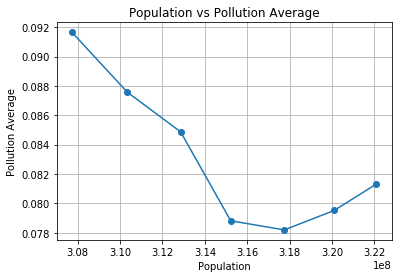

In [57]:
plt.plot(nState_Population_df['Total US Population Estimate'], nState_Population_df['Year Pullutant Average'], marker='o')
plt.title("Population vs Pollution Average")
plt.xlabel("Population")
plt.ylabel("Pollution Average")
plt.grid()
#This graph shows a decrease US pollution average over time coressponding to an increase in US population over time.
#Note the correlation between these two my need to be explained carefully. As we know population tends to increase over time 
# and we have data that shows pollution average decreases overtime (For various reasons).


In [58]:
Mort_percentage = nState_Population_df['Year Mort Count'] / nState_Population_df['Total US Population Estimate']

In [59]:
State_pop_aqi = pd.merge(nState_Population_df, AQI_Mean_by_Year, on="Year")


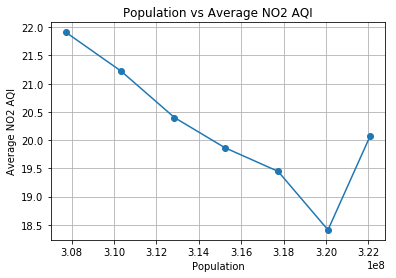

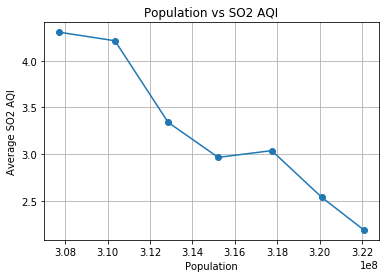

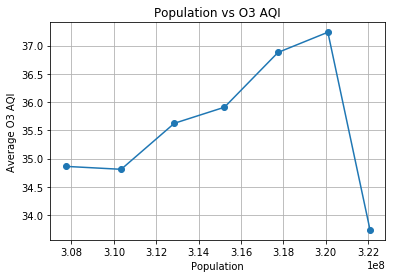

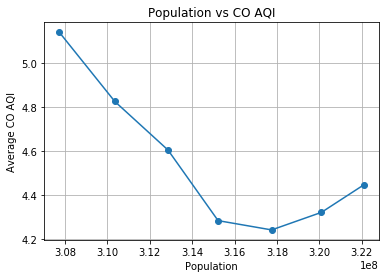

In [60]:
plt.subplot()
plt.plot(State_pop_aqi['Total US Population Estimate'], State_pop_aqi['NO2 AQI'], marker='o')
plt.title("Population vs Average NO2 AQI")
plt.xlabel("Population")
plt.ylabel("Average NO2 AQI")
plt.grid()
plt.show()

plt.subplot()
plt.plot(State_pop_aqi['Total US Population Estimate'], State_pop_aqi['SO2 AQI'], marker='o')
plt.title("Population vs SO2 AQI")
plt.xlabel("Population")
plt.ylabel("Average SO2 AQI")
plt.grid()
plt.show()

plt.subplot()
plt.plot(State_pop_aqi['Total US Population Estimate'], State_pop_aqi['O3 AQI'], marker='o')
plt.title("Population vs O3 AQI")
plt.xlabel("Population")
plt.ylabel("Average O3 AQI")
plt.grid()
plt.show()

plt.subplot()
plt.plot(State_pop_aqi['Total US Population Estimate'], State_pop_aqi['CO AQI'], marker='o')
plt.title("Population vs CO AQI")
plt.xlabel("Population")
plt.ylabel("Average CO AQI")
plt.grid()
plt.show()

In [61]:
#A good analysis might be state population vs State pollutant levels each year for some states 

In [62]:
# nChem_by_ST_Year = Chem_by_ST_Year.set_index(['Year', 'State'])
# nChem_by_ST_Year.head()

In [63]:
#Get DataFrame for the csv of Pollutant means grouped by 'State' then 'Year'
Group_State_then_Year.head()

,State,Year,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,SO2 AQI,CO AQI,O3 AQI,NO2 AQI,Year Average
0,Alabama,2013,0.012066,0.012099,0.000772,0.211873,6.580645,4.129032,18.903226,21.387097,0.059202
1,Alabama,2014,0.009412,0.024633,0.001198,0.206144,7.956954,3.715232,36.947020,21.486755,0.060347
2,Alabama,2015,0.009079,0.024000,0.001028,0.221390,6.950000,3.933333,37.343333,20.026667,0.063874
3,Alabama,2016,0.009525,0.028348,0.000859,0.210097,5.275168,3.906040,39.295302,23.093960,0.062207
4,Alaska,2014,0.011659,0.010307,0.005956,0.455232,14.000000,6.983240,15.206704,21.167598,0.120788


In [64]:
#Note when you first aqcuire data from csv the info is not longer index in the groupby format
#to reacquire groupby index format use set_index function
ST_YR_df = Group_State_then_Year.set_index(['State', 'Year'])
ST_YR_df.head()

NO2 Mean   O3 Mean  SO2 Mean   CO Mean    SO2 AQI    CO AQI  \
State   Year                                                                
Alabama 2013  0.012066  0.012099  0.000772  0.211873   6.580645  4.129032   
        2014  0.009412  0.024633  0.001198  0.206144   7.956954  3.715232   
        2015  0.009079  0.024000  0.001028  0.221390   6.950000  3.933333   
        2016  0.009525  0.028348  0.000859  0.210097   5.275168  3.906040   
Alaska  2014  0.011659  0.010307  0.005956  0.455232  14.000000  6.983240   

                 O3 AQI    NO2 AQI  Year Average  
State   Year                                      
Alabama 2013  18.903226  21.387097      0.059202  
        2014  36.947020  21.486755      0.060347  
        2015  37.343333  20.026667      0.063874  
        2016  39.295302  23.093960      0.062207  
Alaska  2014  15.206704  21.167598      0.120788

In [65]:
#Note loc function called with outer index on the multi-index dataframe will produce 'mini' (subset) dataframe indexed by the inner index 
#For example:
ST_YR_df.loc['Alabama']
#Creates a 'mini' df for Alabama with all the columns. Note the index in this case will be the 'Year' values for Alabama

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,SO2 AQI,CO AQI,O3 AQI,NO2 AQI,Year Average
Year,,,,,,,,,
2013,0.012066,0.012099,0.000772,0.211873,6.580645,4.129032,18.903226,21.387097,0.059202
2014,0.009412,0.024633,0.001198,0.206144,7.956954,3.715232,36.947020,21.486755,0.060347
2015,0.009079,0.024000,0.001028,0.221390,6.950000,3.933333,37.343333,20.026667,0.063874
2016,0.009525,0.028348,0.000859,0.210097,5.275168,3.906040,39.295302,23.093960,0.062207


In [66]:
#To create a graph for Alabama info we first reset the index of our 'mini'(subset) Dataframe
Alabama_poll_data = ST_YR_df.loc['Alabama'].reset_index()
Alabama_poll_data

,Year,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,SO2 AQI,CO AQI,O3 AQI,NO2 AQI,Year Average
0,2013,0.012066,0.012099,0.000772,0.211873,6.580645,4.129032,18.903226,21.387097,0.059202
1,2014,0.009412,0.024633,0.001198,0.206144,7.956954,3.715232,36.947020,21.486755,0.060347
2,2015,0.009079,0.024000,0.001028,0.221390,6.950000,3.933333,37.343333,20.026667,0.063874
3,2016,0.009525,0.028348,0.000859,0.210097,5.275168,3.906040,39.295302,23.093960,0.062207


In [67]:
#we then merge the Alabama pollution DataFrame with the 'Year' and 'Alabama Population' columns Dataframe 
#Made from our State population dataframe
Alabama_Data = pd.merge(Alabama_poll_data, State_pop_aqi[['Year', 'Alabama Population']], on="Year")

In [68]:
Alabama_Data

,Year,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,SO2 AQI,CO AQI,O3 AQI,NO2 AQI,Year Average,Alabama Population
0,2013,0.012066,0.012099,0.000772,0.211873,6.580645,4.129032,18.903226,21.387097,0.059202,4799277.0
1,2014,0.009412,0.024633,0.001198,0.206144,7.956954,3.715232,36.947020,21.486755,0.060347,4817678.0
2,2015,0.009079,0.024000,0.001028,0.221390,6.950000,3.933333,37.343333,20.026667,0.063874,4830620.0
3,2016,0.009525,0.028348,0.000859,0.210097,5.275168,3.906040,39.295302,23.093960,0.062207,4841164.0


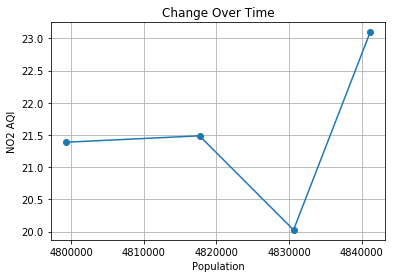

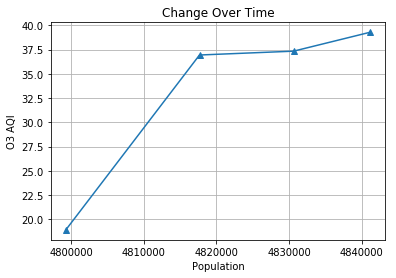

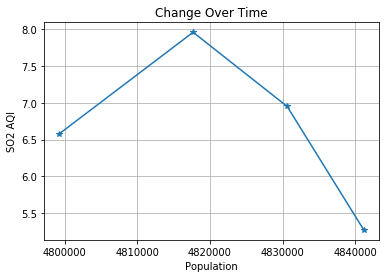

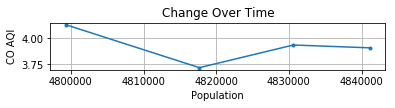

In [72]:
plt.subplot(1,1,1)
plt.plot(Alabama_Data['Alabama Population'],Alabama_Data['NO2 AQI'],marker='o')
plt.title("Change Over Time")
plt.xlabel("Population")
plt.ylabel("NO2 AQI")
plt.grid()
plt.show()

plt.subplot()
plt.plot(Alabama_Data['Alabama Population'],Alabama_Data['O3 AQI'],marker='^')
plt.title("Change Over Time")
plt.xlabel("Population")
plt.ylabel("O3 AQI")
plt.grid()
plt.show()

plt.subplot()
plt.plot(Alabama_Data['Alabama Population'],Alabama_Data['SO2 AQI'],marker='*')
plt.title("Change Over Time")
plt.xlabel("Population")
plt.ylabel("SO2 AQI")
plt.grid()
plt.show()

plt.subplot(4,1,1)
plt.plot(Alabama_Data['Alabama Population'],Alabama_Data['CO AQI'],marker='.')
plt.title("Change Over Time")
plt.xlabel("Population")
plt.ylabel("CO AQI")
plt.grid()
plt.show()

#States with high pollution

In [70]:
nWorld_Pollution_df = World_Pollution_df.drop(columns='Unnamed: 0')
nWorld_Pollution_df.head()

,City,Country,Latitude,Longitude,Value CO,Value NO2,Value O3,Value PM25
0,Tandil,Argentina,-37.321674,-59.133164,0,0,17,7
1,Ushuaia,Argentina,-54.800000,-68.300000,0,0,12,4
2,Villazon,Argentina,-22.100000,-65.600000,0,0,5,5
3,Mendoza,Argentina,-32.890845,-68.827171,1,8,11,54
4,Tandil,Argentina,-37.321674,-59.133164,0,0,23,23


In [71]:
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(
    nWorld_Pollution_df[['Latitude', 'Longitude']], weights=nWorld_Pollution_df['Value NO2'],
    max_intensity=30, point_radius=3.0
)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))